## **BCB546X Python Project**

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

### **Functions**

#### **Function #1**
##### The following function utilizes the 'SeqIO.parse()' function of Biopython.
##### In Biopython, 'Seq' objects are the most basic expressions of sequences, containing only a sequence (as a text string) and its corresponding alphabet (DNA, RNA, Protein, etc.)
##### A 'SeqRecord' is an object that contains a 'Seq' object along with an ID tag and other possible attributes (such as name and description).
##### 'SeqIO.parse()' takes a filename and file format as its arguments, and returns a 'SeqRecord' iterator.

##### https://biopython.org/wiki/SeqIO

In [32]:
def get_sequences_from_file(fasta_fn):                                  #(1) Defines the function's name (which will take the name of a fasta file as its argument).
    sequence_data_dict = {}                                             #(2) Initializes a dictionary named 'sequence_data_dict'.
    for record in SeqIO.parse(fasta_fn, "fasta"):                       #(3) Initializes a for-loop over the 'SeqRecord' iterator extracted from the specified fasta file (1).
        description_list = record.description.split()                   #(4) Extracts the 'description' attribute from each 'SeqRecord' and splits it into a list of the individual words (named 'description_list').
        species_name = description_list[1] + " " + description_list[2]  #(5) Takes the second and third items (words) from 'description_list' separated by a space, and names this string 'species_name'.
        sequence_data_dict[species_name] = record.seq                   #(6) Creates an entry in the dictionary with 'species_name' from (5) as the key and the sequence portion of the 'SeqRecord' object as the value.
    return(sequence_data_dict)                                          #(7) Returns the above-generated dictionary as the function's output.

#### **Function #2**
##### In the following translation function, the input sequence is partitioned into three subsets. The first subset (nucseq[0::3]) contains the first nucleotide of the sequence and every third nucleotide thereafter -- which corresponds to the 1st nucleotide of every codon. Likewise, the second (nucseq[1::3]) and third (nucseq[2::3]) subsets contain the 2nd and 3rd nucleotides, respectively, of each codon.

In [33]:
def translate_function(nucseq):                                                  #(1) Defines the function's name (which will take a nucleotide sequence string or 'SeqRecord' object as its argument).
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]  #(2) Runs the CodonTable module (imported at start of script) and returns the "Vertebrate Mitochondrial" table as an object named 'mito_table'.
    aa_seq = ""                                                                  #(3) Initializes a blank sequence that will be populated with the amino acids of the translated protein.
    for x,y,z in zip(nucseq[0::3],nucseq[1::3],nucseq[2::3]):                    #(4) Initializes a for-loop of three indices iterated over each of the three sequence subsets (described above).
        codon = x + y + z                                                        #(5) Combines the nucleotides at a given index value into a three-letter text string (i.e. the codon).
        if codon in mito_table.stop_codons:                                      #(6) If the 'codon' is a stop codon, then the translation is terminated without adding another symbol to the sequence. #http://biopython.org/DIST/docs/tutorial/Tutorial.html Section 3.10
            break
        else:
            aa_seq += (mito_table.forward_table[codon])                          #(7) If the 'codon' is not a stop codon, the mito_table converts it to the corresponding amino acid (represented with single-letter codes) and adds the letter to the growing sequence.
    return(aa_seq)                                                               #(8) Returns the finished amino acid sequence after the translation terminates.

#### **Function #3**

In [34]:
def alt_translator(nucseq):                                                        #(1) Defines the function's name (again taking a nucleotide sequence string or 'SeqRecord' object as its argument).
    seq_object = nucseq.translate(table="Vertebrate Mitochondrial", to_stop=True)  #(2) Uses the 'translate' function in the CodonTable module to convert the input sequence into a 'Seq' object containing the amino acid sequence.  https://biopython.org/wiki/Seq
    return(str(seq_object))                                                        #(3) Returns the translated amino acid sequence in the form of a text string.

#### **Function #4**

In [35]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis      # https://biopython.org/wiki/ProtParam
def compute_molecular_weight(aa_seq):                   #(1) Defines the function's name (which will take an amino acid sequence in the form of a text string as its argument).
    return(ProteinAnalysis(aa_seq).molecular_weight())  #(2) The 'ProteinAnalysis' function converts the input sequence into a specialized object, which is then analyzed using the 'molecular_weight' method to yield the molecular weight of the input sequence.

#### **Function #5**

In [36]:
def gc_content(nucseq):             #(1) Defines the function's name (which will take a nucleotide sequence string or 'SeqRecord' object as its argument).
    gc = 0                          #(2) Initializes the counter for the number of 'G' and 'C' nucleotides in the input sequence.
    nuc = 0                         #(3) Initializes the counter for the total number of 'A', 'T', 'G', and 'C' nucleotides in the input sequence.
    for n in nucseq:                #(4) Initializes a for-loop over each element in the input sequence.
        if n in ['G','C']:          #(5) For each element in the input sequence, if the element is a 'G' or 'C' then 'gc' is increased by 1.
            gc += 1
        if n in ['A','T','G','C']:  #(6) For each element in the input sequence, if the element is an 'A', 'T', 'G', or 'C' then 'nuc' is increased by 1.
            nuc += 1
    gc_ratio = gc / nuc             #(7) Calculates the ratio of 'G' and 'C' nucleotides in the sequence.
    return(gc_ratio)                #(8) Returns the calculated ratio.

### **Main**

#### **Step #6**

In [37]:
cytb_seqs = get_sequences_from_file("bears_cytb.fasta")  # Generates a dictionary named 'cytb_seqs' containing the species names and sequences extracted from the 'bears_cytb.fasta' file.

In [38]:
bears_df = pd.read_csv("bears_mass.csv")  # Imports the data from 'bears_mass.csv' into a pandas DataFrame named 'bears_df'.

In [39]:
bears_df['Molecular_Weight'] = "NaN"  # Adds a column named 'Molecular_Weight' to the 'bears_df' dataframe with 'NaN' as its values.

In [40]:
bears_df['GC_Content'] = "NaN"  # Adds a column named 'GC_Content' to the 'bears_df' dataframe with 'NaN' as its values.

In [41]:
species_list = list(bears_df.species)  # Converts the entries in the 'species' column of 'bears_df' into a list named 'species_list'.

In [42]:
bears_df

,species,mass,Molecular_Weight,GC_Content
0,Ursus spelaeus,550.800,NaN,NaN
1,Ursus arctos,203.500,NaN,NaN
2,Ursus thibetanus,99.714,NaN,NaN
3,Melursus ursinus,100.030,NaN,NaN
4,Ursus americanus,110.560,NaN,NaN
5,Helarctos malayanus,47.020,NaN,NaN
6,Ailuropoda melanoleuca,118.200,NaN,NaN
7,Tremarctos ornatus,140.700,NaN,NaN
8,Ursus maritimus,425.100,NaN,NaN


#### **Step #7**

In [45]:
for key, value in cytb_seqs.items():                                                              #(1) Initializes a for-loop over the keys and values contained in the dictionary 'cytb_seqs'.
    aa_seq = alt_translator(value)                                                                #(2) Uses Function #3 to translate the nucleotide sequence contained in a dictionary 'value' into an amino acid sequence (as a string of single-letter codes) named 'aa_seq'.
    bears_df.loc[bears_df.species == key, 'Molecular_Weight'] = compute_molecular_weight(aa_seq)  #(3) Uses the 'key' (species name) for the 'value' from (2) to locate the cell in the 'bears_df' DataFrame corresponding to this species and its 'Molecular_Weight', then calculates the molecular weight of 'aa_seq' using Function #4 and records the result in that cell.
    bears_df.loc[bears_df.species == key, 'GC_Content'] = gc_content(value)                       #(4) Locates the cell in the 'bears_df' DataFrame corresponding to this species ('key') and 'GC_Content', then calculates the GC content of the original nucleotide sequence ('value') using Function #5 and records the result in that cell.
bears_df                                                                                          #(5) Returns the 'bears_df' DataFrame with the calculated values recorded in the 'Molecular_Weight' and 'GC_Content' columns.

,species,mass,Molecular_Weight,GC_Content
0,Ursus spelaeus,550.800,42458.8,0.437719
1,Ursus arctos,203.500,42414.7,0.437719
2,Ursus thibetanus,99.714,42306.7,0.45614
3,Melursus ursinus,100.030,42552,0.451754
4,Ursus americanus,110.560,42427.7,0.439474
5,Helarctos malayanus,47.020,42560.9,0.442982
6,Ailuropoda melanoleuca,118.200,42702.2,0.407895
7,Tremarctos ornatus,140.700,42384.8,0.44386
8,Ursus maritimus,425.100,42454.8,0.442982


#### **Step #8**

In [46]:
species_mass = bears_df.set_index('species').mass  # Sets the species names as the row indices in 'bears_df', then pulls out the 'mass' column and saves it as the pandas series 'species_mass'.

Text(0.5,0,'Species')

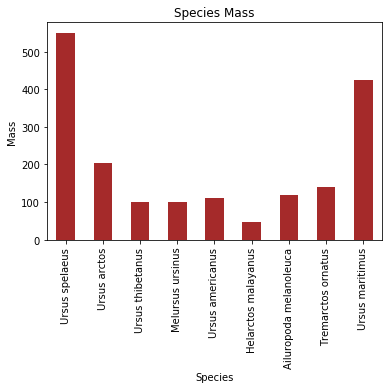

In [51]:
mass_plot = species_mass.plot(kind='bar',title='Species Mass', color='brown')  #(1) Creates a bar graph out of the 'species_mass' series with the title 'Species Mass', and saves it under the figure variable 'mass_plot'.
mass_plot.set_ylabel("Mass")                                                   #(2) Labels the y-axis on the bar chart as 'Mass'.
mass_plot.set_xlabel("Species")                                                #(3) Labels the x-axis on the bar chart as 'Species'.

##### **Q1. What is the largest bear species?**
##### The largest bear species is Ursus spelaeus.

##### **Q2. What else is interesting about this species?**
##### They are believed to have (at least partly) lived in caves -- and not merely using them for hibernation as brown bears do.  (https://en.wikipedia.org/wiki/Cave_bear)

#### **Step #9**

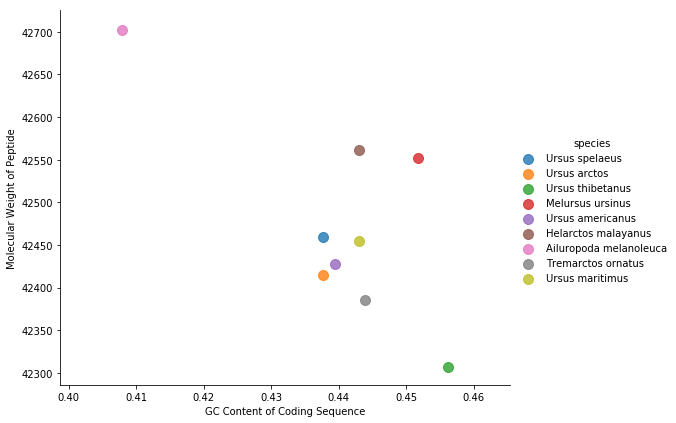

In [18]:
weight_gc = sns.lmplot('GC_Content', 'Molecular_Weight', data=bears_df, fit_reg=False, height=6, aspect=1.25, scatter_kws={"s": 100}, hue='species')  #(1) Creates a scatter plot showing the Molecular Weight as a function of the GC Content for each species in 'bears_df', with the points color-coded according to the species.
weight_gc.set_axis_labels('GC Content of Coding Sequence', 'Molecular Weight of Peptide')                                                             #(2) Adds identifying labels to the x- and y-axes.

#### **Step #10**

In [19]:
bears_df.to_csv('bears_mass_cytb.csv',index_label=False)  # Saves the expanded 'bears_df' DataFrame as a csv file named 'bears_mass_cytb.csv'.

### **Bonus**

##### I Decided to look more closely at the degree of polymorphism present in the nucleotide sequences. First I identified all the positions where nucleotide differences were present among any of the sequences, and then I analyzed the rate and distribution of these differences over the length of the sequences:

In [20]:
poly_site = []                                         #(1) Initializes a blank list that will be populated with the positions of any nucleotide polymorphisms.
for i in range(len(cytb_seqs[species_list[0]])):       #(2) Initializes a for-loop over the index of the nucleotides present in the first sequence (which is the same number of nucleotides for all the sequences considered).
    count = 0                                          #(3) Initializes a counter to capture any nucleotide differences found between two sequences at a given index.
    for j in range(9):                                 #(4) Initializes a for-loop over the number of species (sequences) being compared.
        seq_j = cytb_seqs[species_list[j]]             #(5) Recalls the jth sequence ('Seq' object) from the 'cytb_seqs' dictionary and names it 'seq_j'.
        if cytb_seqs[species_list[0]][i] != seq_j[i]:  #(6) For a given index i, checks to see if the ith value of 'seq_j' is different from the ith value in the first sequence, and if so increases the 'count' by 1.
            count += 1
    if count > 0:                                      #(7) The 'count' will stay equal to 0 if and only if every sequence has an identical value at the ith position. Otherwise, the index i will be added to the 'poly_site' list.
        poly_site.append(i) 
print(poly_site)                                       #(8) Returns the list of all sequence positions where a polymorphism occurs in one or more species.

[4, 20, 23, 27, 31, 32, 38, 41, 46, 51, 53, 59, 62, 66, 71, 77, 80, 83, 84, 86, 92, 98, 101, 107, 108, 110, 113, 114, 116, 119, 120, 122, 123, 125, 126, 128, 131, 134, 135, 137, 140, 144, 146, 149, 152, 155, 158, 164, 168, 173, 174, 176, 177, 179, 185, 188, 194, 195, 198, 200, 203, 206, 209, 215, 218, 219, 221, 224, 227, 231, 233, 242, 243, 248, 251, 254, 257, 260, 263, 266, 269, 272, 278, 279, 281, 284, 287, 293, 296, 299, 302, 303, 305, 308, 311, 314, 317, 324, 326, 327, 329, 332, 338, 341, 343, 344, 347, 350, 353, 360, 362, 366, 368, 377, 383, 386, 389, 392, 395, 398, 404, 413, 416, 419, 428, 431, 434, 437, 443, 446, 447, 452, 455, 458, 464, 467, 471, 473, 474, 479, 485, 488, 489, 497, 500, 503, 506, 509, 510, 512, 515, 518, 521, 524, 527, 533, 536, 539, 542, 551, 552, 554, 557, 560, 563, 566, 567, 568, 569, 570, 575, 576, 577, 578, 579, 580, 581, 584, 587, 593, 596, 599, 602, 611, 614, 617, 620, 626, 632, 633, 638, 639, 642, 644, 656, 659, 660, 662, 665, 668, 669, 680, 683, 684, 68

In [65]:
len(poly_site) / len(cytb_seqs[species_list[0]]) # Calculates the ratio of positions in the nucleotide sequences that show some degree of polymorphism across species.

0.3131578947368421

[Text(0,0.5,'Number of Nucleotide Differences (out of 30)'),
 Text(0.5,0,'Position Along Nucleotide Sequence (Length = 1140)')]

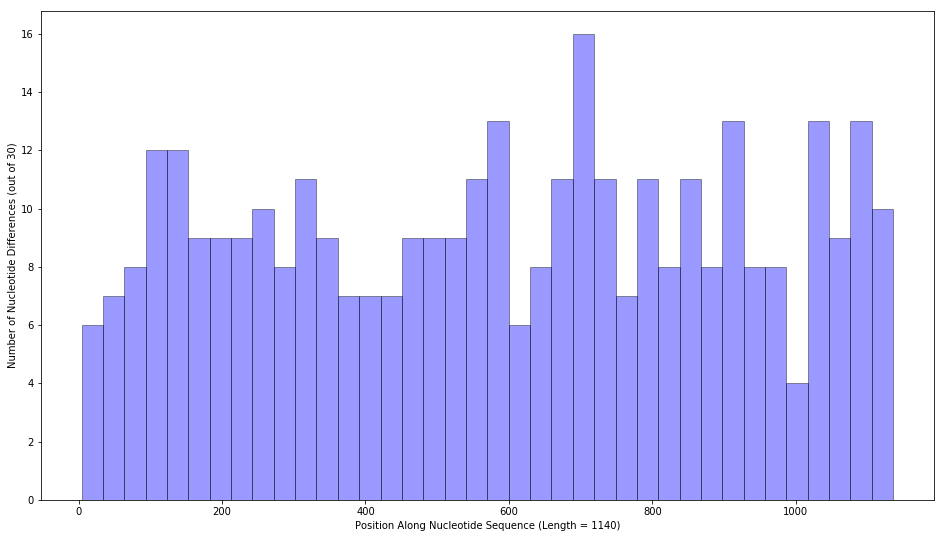

In [67]:
plot_dims = (16, 9)                                                                                                         #(1) Defines the size dimensions for the histogram.
fig, ax = plt.subplots(figsize=plot_dims)                                                                                   #(2) Sets the dimensions for the plotted object to those specified in (1).
sns.distplot(poly_site, kde=False, color='b', hist_kws=dict(edgecolor="k", linewidth=1), bins=38)                           #(3) Creates a histogram of the nucleotide differences occurring along the sequence, with each box representing 30 nucleotides.
ax.set(ylabel='Number of Nucleotide Differences (out of 30)', xlabel='Position Along Nucleotide Sequence (Length = 1140)')  #(4) Adds identifying labels to the x- and y-axes.

##### Next I generated a table showing which nucleotide is present in each species at each of the polymorphism locations identified above:

In [68]:
poly_array = []                                               #(1) Initializes a blank list that will be populated with each sequence's values at the polymorphism sites.
for j in range(9):                                            #(2) Initializes a for-loop over the number of species (sequences) being compared.
    seq = []                                                  #(3) Initializes a blank list that will be populated with the nucleotides in the jth sequence located at each polymorphism site.
    for i in range(len(poly_site)):                           #(4) Initializes a for-loop over the total number of polymorphism sites occurring in the sequences.
        seq.append(cytb_seqs[species_list[j]][poly_site[i]])  #(5) Returns the value of the jth sequence at each polymorphism site, and appends the result to the 'seq' list.
    poly_array.append(seq)                                    #(6) Appends the full list of the jth sequence's values at the polymorphism sites to the 'poly_array'.
print(poly_array)                                             #(7) Returns the array containing the lists of each sequence's values at the polymorphism sites.

[['C', 'C', 'T', 'T', 'C', 'T', 'C', 'C', 'A', 'T', 'T', 'C', 'C', 'A', 'A', 'C', 'C', 'A', 'G', 'A', 'A', 'T', 'A', 'C', 'C', 'C', 'A', 'G', 'A', 'C', 'T', 'A', 'A', 'T', 'C', 'A', 'G', 'C', 'C', 'A', 'A', 'C', 'G', 'T', 'A', 'T', 'A', 'C', 'T', 'C', 'A', 'A', 'A', 'C', 'C', 'T', 'A', 'A', 'A', 'C', 'T', 'T', 'C', 'C', 'T', 'C', 'C', 'C', 'T', 'G', 'T', 'T', 'A', 'T', 'A', 'C', 'A', 'C', 'C', 'A', 'C', 'T', 'T', 'C', 'A', 'C', 'G', 'A', 'A', 'G', 'C', 'C', 'A', 'C', 'T', 'C', 'A', 'T', 'C', 'T', 'A', 'A', 'A', 'C', 'T', 'T', 'C', 'T', 'T', 'C', 'T', 'G', 'C', 'C', 'C', 'A', 'A', 'T', 'C', 'A', 'A', 'G', 'C', 'C', 'A', 'T', 'C', 'T', 'C', 'A', 'C', 'G', 'C', 'T', 'T', 'C', 'A', 'G', 'G', 'A', 'A', 'A', 'A', 'A', 'C', 'T', 'C', 'A', 'G', 'T', 'G', 'A', 'T', 'A', 'A', 'C', 'T', 'C', 'C', 'C', 'C', 'C', 'G', 'C', 'C', 'C', 'T', 'T', 'A', 'G', 'A', 'G', 'C', 'A', 'G', 'C', 'A', 'C', 'T', 'G', 'T', 'A', 'C', 'A', 'C', 'C', 'C', 'T', 'C', 'C', 'T', 'G', 'T', 'A', 'A', 'T', 'C', 'C', 'A', 'C'

In [69]:
poly_df = pd.DataFrame(poly_array)  # Converts the list of each sequence's values at the polymorphism sites to a pandas DataFrame.

In [70]:
poly_df.columns = poly_site  # Sets the sequence positions of the polymorphisms as the column labels.

In [71]:
poly_df.set_index([species_list])  # Sets the species names as the row labels.

,4,20,23,27,31,32,38,41,46,51,...,1107,1109,1112,1118,1121,1123,1124,1129,1133,1136
Ursus spelaeus,C,C,T,T,C,T,C,C,A,T,...,G,A,T,A,C,A,C,T,G,A
Ursus arctos,C,C,C,T,C,T,C,C,A,C,...,G,A,T,A,T,A,C,T,G,G
Ursus thibetanus,C,C,T,T,C,C,C,C,A,C,...,G,A,C,A,C,A,C,C,A,A
Melursus ursinus,C,C,C,T,C,T,C,T,A,C,...,G,A,C,A,T,A,T,C,G,A
Ursus americanus,C,C,C,T,C,T,C,C,A,C,...,G,G,C,A,T,A,C,C,A,A
Helarctos malayanus,C,C,C,T,C,T,C,T,A,C,...,G,A,T,A,T,A,C,C,A,A
Ailuropoda melanoleuca,T,T,T,T,T,T,T,C,A,T,...,A,C,T,G,T,G,C,C,A,A
Tremarctos ornatus,C,T,C,C,C,T,C,C,G,T,...,G,A,C,A,T,A,C,C,G,A
Ursus maritimus,C,C,C,T,C,T,C,C,A,T,...,G,A,T,A,C,A,C,T,G,G


##### As the 'poly_df' table above suggests though, at any given polymorphic site most of the species still tend to have the same nucleotide present, while only a couple species 'deviate' from the group. For each species then, we can determine the number of these sites at which the species has a nucleotide that differs from the 'group average' nucleotide at that site. (This will provide a measure of the relative degree of polymorphism present in each species' sequence.)

In [72]:
seq_poly = [] #(1) Initializes a blank list that will be populated with the number of nucleotides in each sequence located at each polymorphism site.
for i in range(9): #(2) Initializes a for-loop over the number of species (sequences) present.
    poly_i = 0 #(3) Initializes a counter for the number of sites where the ith species has a nucleotide that differs from the 'group average' nucleotide at that site.
    for n in range(len(poly_site)):
        count = 0
        for j in range(9):
            seq_j = cytb_seqs[species_list[j]]
            if cytb_seqs[species_list[i]][poly_site[n]] == seq_j[poly_site[n]]:
                count += 1
        if count < 5:
            poly_i +=1
    seq_poly.insert(i, poly_i)
print(seq_poly)

[52, 54, 85, 66, 94, 67, 151, 138, 46]


In [28]:
seq_dev = pd.DataFrame(seq_poly)

In [29]:
seq_dev.columns = ["Sites"]

In [30]:
seq_dev = seq_dev.set_index([species_list]).Sites

Text(0.5,0,'Species')

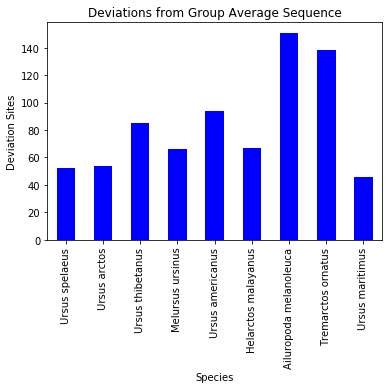

In [31]:
dev_plot = seq_dev.plot(kind='bar',title='Deviations from Group Average Sequence', color='blue') #(1) Creates a bar graph out of the 'seq_dev' series with the title 'Deviations from Group Average Sequence', and saves it under the figure variable 'dev_plot'.
dev_plot.set_ylabel("Deviation Sites") #(2) Labels the y-axis on the bar chart as 'Deviation Sites'.
dev_plot.set_xlabel("Species") #(3) Labels the x-axis on the bar chart as 'Species'.